# Matrix Product States

In [ ]:
import numpy as np

!pip install mpnum
import mpnum as mp

     |████████████████████████████████| 81kB 3.8MB/s 


MPNUM PACKAGE
https://mpnum.readthedocs.io/en/latest/

In [ ]:
%matplotlib inline

import scipy as sp
import scipy.sparse as spa

import matplotlib.pyplot as plt
import seaborn as sns

# GHZ

In [ ]:
#### Actual GHZ ########################

def GHZ_state(n):

	#n=number of qubits

	ghz = np.zeros(shape=(2**n, 1) ,dtype=np.complex)

	ghz[0] = 1/np.sqrt(2)
	ghz[(2**n)-1] = 1/np.sqrt(2)

	#rho = np.outer(ghz, ghz)

	return ghz
##############################################



In [ ]:
'''
MPS
'''

# N_sites=4
def Create_GHZ_mpnum(N_sites=4):

    # Copy tensors used to construct GHZ as an MPS. The procedure below should work for any other MPS 
    cc = np.zeros((2,2)); # corner
    cc[0,0] = 2**(-1.0/(2*N_sites));
    cc[1,1] = 2**(-1.0/(2*N_sites));

    # mpnum_cc=mp.MPArray.from_array(cc)

    cb = np.zeros((2,2,2)); # bulk
    cb[0,0,0] = 2**(-1.0/(2*N_sites));
    cb[1,1,1] = 2**(-1.0/(2*N_sites));

    MPS_mpnum=[]
    MPS = []
    lten2=[]

    ###########################################
    MPS.append(cc)


    # lten2.append(mp.MPArray.from_array( cc.reshape(1,2,2), 1 ))
    lten2.append(cc.reshape(1,2,2))

    MPS_mpnum.append(mp.MPArray.from_array( cc.reshape(1,2,2) ))
    # MPS_mpnum.append(mp.MPArray.from_array(cc, ndims= 1 ))


    for i in range(N_sites-2):
        MPS.append(cb)

        MPS_mpnum.append(mp.MPArray.from_array( cb ) )

        #lten2.append(mp.MPArray.from_array( cb ,  1 ))
        lten2.append(cb)
        # MPS_mpnum.append(mp.MPArray.from_array(cb, ndims= 1 ))

    MPS.append(cc) 

    MPS_mpnum.append(mp.MPArray.from_array(cc.reshape(2,2,1)))

    #lten2.append(mp.MPArray.from_array( cc.reshape(2,2,1) , 1 ))
    lten2.append(cc.reshape(2,2,1))
    
    mps_2=mp.mparray.MPArray(lten2)
    
    return mps_2

    # MPS_mpnum.append(mp.MPArray.from_array(cc, ndims= 1 ))

In [ ]:
# mps_2=mp.mparray.MPArray(lten2)
mps_2=Create_GHZ_mpnum(3)
print('MPS', mps_2.to_array().ravel())
print('Exact', GHZ_state(3).T.real)

MPS [0.70710678 0.         0.         0.         0.         0.
 0.         0.70710678]
Exact [[0.70710678 0.         0.         0.         0.         0.
  0.         0.70710678]]


# W-state

In [ ]:
######### MPS ######################

def Create_W_mpnum(N_sites=4):


    ## Refer to Bridgeman hand-wavy
    ## b for bulk
    cb = np.zeros((2,2,2)); # bulk
    cb[1,0,1] = 1.0 #2**(-1.0/(2*N_sites));
    
    cb[0,1,1] = 1.0 #2**(-1.0/(2*N_sites));
    cb[0,0,0] = 1.0

    

    lten2=[]

    for i in range(N_sites):

        #lten2.append(mp.MPArray.from_array( cb ,  1 ))
        lten2.append(cb)

    #lten2.append(cnl)
    X_pauli=np.array([[0,1], [1,0]])
    lten2.append(X_pauli)
    
 
    mps_2=mp.mparray.MPArray(lten2)
    
    return 1/np.sqrt(N_sites)*mps_2

    # MPS_mpnum.append(mp.MPArray.from_array(cc, ndims= 1 ))

In [ ]:
################# ACTUAL STATE ############
def W_state(N_QUBITS):
    n_q=N_QUBITS
    init_w=np.zeros(shape=(2**n_q, 1),dtype=np.complex)

    #ctr=0
    for j in range(n_q):
        init_w[2**j]=1/np.sqrt(n_q)
    
    return init_w


In [ ]:
mps_3=Create_W_mpnum(N_sites=4)
print('MPS',mps_3.to_array().ravel())
print('Exact',W_state(4).T.real)

MPS [0.  0.5 0.5 0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
Exact [[0.  0.5 0.5 0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0. ]]


# AKLT


In [ ]:
'''
MPS
'''

# N_sites=4
def AKLT_mpnum(N_sites=4, bc='open'):

    if bc=='periodic': 
        
        ## b for bulk
        cb = np.zeros((2,3,2)); # bulk (read from left to right)
        cb[0,0,1] = np.sqrt(2/3) ;

        cb[1, 1 ,1] = np.sqrt(1/3) ;
        cb[0, 1 ,0] = -1*np.sqrt(1/3) ;

        cb[1, 2 ,0] = -1*np.sqrt(2/3);



        lten2=[]

        for i in range(N_sites):

            #lten2.append(mp.MPArray.from_array( cb ,  1 ))
            lten2.append(cb)

#         #lten2.append(cnl)
#         X_pauli=np.array([[0,1], [1,0]])
#         lten2.append(X_pauli)


        mps_2=mp.mparray.MPArray(lten2)


    if bc=='open':
        # Copy tensors used to construct AKLT as an MPS. The procedure below should work for any other MPS 
        # The boundary can have arbitary spin-1/2 states

        cc = np.zeros((2,2)); # corner
        cc[0,0] = 1.0 #2**(-1.0/(2*N_sites));
        cc[1,1] = 1.0 #2**(-1.0/(2*N_sites));

        # mpnum_cc=mp.MPArray.from_array(cc)

        ## Bulk

        cb = np.zeros((2,3,2)); # bulk (read from left to right)
        cb[0,0,1] = np.sqrt(2/3) ;

        cb[1, 1 ,1] = np.sqrt(1/3) ;
        cb[0, 1 ,0] = -1*np.sqrt(1/3) ;

        cb[1, 2 ,0] = -1*np.sqrt(2/3);

        MPS_mpnum=[]
        MPS = []
        lten2=[]

        ###########################################
        MPS.append(cc)


        # lten2.append(mp.MPArray.from_array( cc.reshape(1,2,2), 1 ))
        lten2.append(cc.reshape(1,2,2))

        MPS_mpnum.append(mp.MPArray.from_array( cc.reshape(1,2,2) ))
        # MPS_mpnum.append(mp.MPArray.from_array(cc, ndims= 1 ))

        #1<i<N
        for i in range(N_sites-2):
            MPS.append(cb)

            MPS_mpnum.append(mp.MPArray.from_array( cb ) )

            #lten2.append(mp.MPArray.from_array( cb ,  1 ))
            lten2.append(cb)
            # MPS_mpnum.append(mp.MPArray.from_array(cb, ndims= 1 ))

            MPS.append(cc) 

            MPS_mpnum.append(mp.MPArray.from_array(cc.reshape(2,2,1)))

            #lten2.append(mp.MPArray.from_array( cc.reshape(2,2,1) , 1 ))
            lten2.append(cc.reshape(2,2,1))

            #print(lten2)
            #print([el.shape for el in lten2])
        
            mps_2=mp.mparray.MPArray(lten2)
        
    return mps_2

    # MPS_mpnum.append(mp.MPArray.from_array(cc, ndims= 1 ))

In [ ]:
# mps_2=mp.mparray.MPArray(lten2)
mps_3=AKLT_mpnum(3)
print(mps_3.shape)
print('MPS', mps_3.to_array().ravel())
print('array_shape', mps_3.to_array().ravel().shape)


mps_3=AKLT_mpnum(3, bc='periodic')

print(mps_3.shape)
print('MPS', mps_3.to_array().ravel())
print('array_shape', mps_3.to_array().ravel().shape)



((2,), (3,), (2,))
MPS [ 0.          0.81649658 -0.57735027  0.          0.          0.
  0.          0.          0.          0.57735027 -0.81649658  0.        ]
array_shape (12,)
((3,), (3,), (3,))
MPS [ 0.          0.          0.          0.          0.         -0.38490018
  0.          0.38490018  0.          0.          0.          0.38490018
  0.         -0.19245009  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
array_shape (27,)


In [ ]:
mp.norm(mps_3)
#Can normalize the state

1.4142135623730951

Boundary Conditions:
For periodic boundary conditions, Hamiltonian includes projector
connecting sites 1 and N. Then ground state is unique.

For open boundary conditions, there are 'left-over spin-1/2' degrees of
freedom at both ends of chain. Ground state is four-fold degenerate.

![Screen%20Shot%202020-11-29%20at%2012.16.54%20AM.png](attachment:Screen%20Shot%202020-11-29%20at%2012.16.54%20AM.png)

# Correlations 



In [ ]:
#### Initializations for computing correlators #####
ldim = 2
## Since we are dealing with qubits while with GHZ states

# Spin up and down (pure states)
up = np.array([1, 0], dtype=complex)
down = np.array([0, 1], dtype=complex)

# Spin up and down (density matrices)
puu = np.outer(up, up.conj())
pdd = np.outer(down, down.conj())

# Pauli matrices
px = np.array([[0, 1], [1, 0]], dtype=complex)
py = np.array([[0, -1j], [1j, 0]], dtype=complex)
pz = np.array([[1, 0], [0, -1]], dtype=complex)

Convert the vectors and matrices to MPS and MPO objects with a single site. 

This is used to compute tensor products as matrix products states/operators. 

In [ ]:
mup, mdown = (mp.MPArray.from_array(x, ndims=1) for x in (up, down))
mpx, mpy, mpz, muu, mdd = (mp.MPArray.from_array(x, ndims=2) for x in (px, py, pz, puu, pdd))
mid = mp.factory.eye(sites=1, ldim=ldim)

<!-- Here is an overview of the MPSs and MPOs defined above:
\begin{align}
  \texttt{mup} &= \vert0\rangle \\
  \texttt{mdown} &= \vert1\rangle \\
  \texttt{muu} &= \vert0\rangle\langle0\vert \\
  \texttt{mdd} &= \vert1\rangle\langle1\vert \\
  \texttt{mpx} &= \sigma_X \\
  \texttt{mpy} &= \sigma_Y \\
  \texttt{mpz} &= \sigma_Z \\
  \texttt{mid} &= \mathbb 1 \quad \text{(single qubit)} \\
\end{align} -->

The following function computes
$$
\text{cov}_\rho(A_i, B_j) = \text{tr}(A_i B_j \rho) - \text{tr}(A_i \rho) \text{tr}(B_j \rho)
$$
for a pure state $\rho = \vert\psi\rangle\langle\psi\vert$.

In [ ]:
def cov_ab(psi, a, b, pos1, pos2):
    if pos1 == pos2:
        return np.nan  # Return not a number
    # Todo: Verify that imaginary parts are small
    # Apply a on site pos1
    ept_a = mp.inner(psi, mp.partialdot(a, psi, pos1)).real
    # Apply b on site pos2
    ept_b = mp.inner(psi, mp.partialdot(b, psi, pos2)).real
    ept_ab = mp.inner(
        psi,
        mp.partialdot(a, mp.partialdot(b, psi, pos2), pos1)
    ).real
    #print(ept_a)
    cov = ept_ab - ept_a * ept_b
    return cov

In [ ]:
n_sites=4
psi=Create_GHZ_mpnum(N_sites=n_sites)

In [ ]:
def fn_covariance(psi, Op1=mpz, Op2=mpz):
    covariances = [
        [
            cov_ab(psi, Op1, Op2, pos1, pos2)
            for pos2 in range(n_sites)
        ]
        for pos1 in range(n_sites)
    ]
    
    return covariances

In [1]:
# sns.heatmap(fn_covariance(psi), vmin=-1, vmax=1, cmap='coolwarm', square=True) \
#     .set(title='$<Z_i, Z_j>$ of the GHZ state')
# None

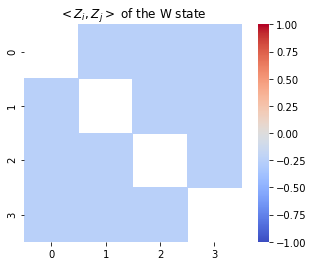

In [ ]:
n_sites=4
psi=Create_W_mpnum(N_sites=n_sites)

sns.heatmap(fn_covariance(psi), vmin=-1, vmax=1, cmap='coolwarm', square=True) \
    .set(title='$<Z_i, Z_j>$ of the W state')
None

AKLT  <br>
Factory:
Change the initialization from ldim=2 to ldim=3 <br>
Update the Cov fn

In [ ]:
mpz
sz = np.array([[-1.,0,0],[0,0,0],[0,0,1.]]).reshape(3,1,3)
sz3=np.array([[1.,0,0],[0,0,0],[0,0,-1.]])

# cb = np.zeros((2,3,2)); # bulk (read from left to right)
# cb[1,0,0] = np.sqrt(2/3) ;

# cb[1, 1 ,1] = -1*np.sqrt(1/3) ;
# cb[0, 1 ,0] = np.sqrt(1/3) ;


mpz3 = mp.MPArray.from_array(sz, ndims=3)

#mpz3 = mp.MPArray.from_array(sz3)

In [ ]:
def cov_ab1(psi, a, b, pos1, pos2):
    #print(a.shape)
    if pos1 == pos2:
        return np.nan  # Return not a number
    # Todo: Verify that imaginary parts are small
    # Apply a on site pos1
    ept_a = mp.inner(psi, mp.partialdot(a, psi, pos1)).real
    # Apply b on site pos2
    ept_b = mp.inner(psi, mp.partialdot(b, psi, pos2)).real
    ept_ab = mp.inner(
        psi,
        mp.partialdot(a, mp.partialdot(b, psi, pos2), pos1)
    ).real
    #print(ept_a)
    cov = ept_ab #- ept_a * ept_b
    return cov

def fn_covariance1(psi, Op1=mpz3, Op2=mpz3):
    print(mpz3)
    covariances1 = [
        [
            cov_ab1(psi, Op1, Op2, pos1, pos2)
            for pos2 in range(n_sites)
        ]
        for pos1 in range(n_sites)
    ]
    
    #print(covariances.shape)
    
    return covariances1

In [ ]:
n_sites=10
psi=AKLT_mpnum(N_sites=n_sites, bc='periodic')

# sns.heatmap(fn_covariance(psi), vmin=-1, vmax=1, cmap='coolwarm', square=True) \
#     .set(title='$cov(Z_i, Z_j)$ of the GHZ state')
# None
# psi.shape

In [ ]:
# fn_covariance1(psi)

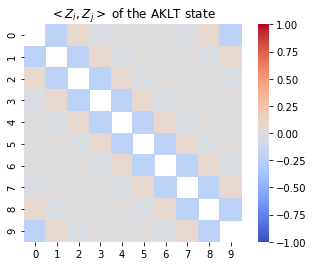

In [ ]:
sns.heatmap(fn_covariance1(psi), vmin=-1, vmax=1, cmap='coolwarm', square=True) \
    .set(title='$<Z_i, Z_j>$ of the AKLT state')
None

![image.png](attachment:image.png)


In [ ]:
# list(fn_covariance1_lin(psi)[0])
from mpnum.utils.array_transforms import local_to_global


sz = np.array([[1.,0,0],[0,0,0],[0,0,-1.]]).reshape(3,1,3)
sz3=np.array([[1.,0,0],[0,0,0],[0,0,-1.]])


#mpz3 = mp.MPArray.from_array(sz, ndims=3)

mpz3 = local_to_global(sz3, sites=1)

mpz3 = mp.MPArray.from_array_global(mpz3, ndims=2)



n_sites=10
psi=AKLT_mpnum(N_sites=n_sites, bc='periodic')


In [ ]:
def cov_ab2(psi, a, b, pos1, pos2):
    #print(a.shape)
    if pos1 == pos2:
        return np.nan  # Return not a number
    # Todo: Verify that imaginary parts are small
    # Apply a on site pos1
    ept_a = mp.inner(psi, mp.partialdot(a, psi, pos1)).real
    # Apply b on site pos2
    ept_b = mp.inner(psi, mp.partialdot(b, psi, pos2)).real
    ept_ab = mp.inner(
        psi,
        mp.partialdot(a, mp.partialdot(b, psi, pos2), pos1)
    ).real
#     print('ept_a',ept_a)
#     print('ept_b',ept_b)
#     print('ept_ab',ept_ab)
    cov = ept_ab  #- ept_a * ept_b
    return 2*cov

def fn_covariance1_lin(psi, Op1=mpz3, Op2=mpz3):
    #print(mpz3)
    covariances1 = [
        [
            cov_ab2(psi, Op1, Op2, 0, pos2)
            for pos2 in range(n_sites)
        ]
        
    ]
    
    #print(covariances.shape)
    
    return covariances1

((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
[-0.444512184795678, 0.14835136920184927, -0.04999237921048618, 0.01828989483310472, -0.010973936899862828, 0.018289894833104677, -0.04999237921048619, 0.14835136920184924, -0.444512184795678]


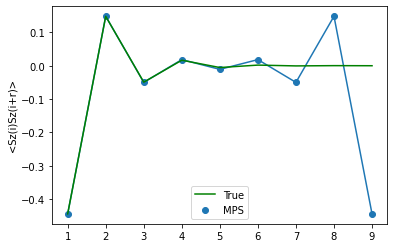

In [ ]:
import matplotlib.pyplot as plt

corr_r0=fn_covariance1_lin(psi)[0][1:]

rvec=np.arange(1,n_sites)
print(corr_r0)
plt.scatter(rvec,corr_r0, label='MPS')
plt.plot(rvec,corr_r0)
plt.plot(rvec, 4/3*(-1/3)**rvec, color='green', label='True')
plt.ylabel("<Sz(i)Sz(i+r)>")

plt.legend()

In [ ]:
n_sites=100
psi=AKLT_mpnum(N_sites=n_sites, bc='periodic')

corr_r0=fn_covariance1_lin(psi)[0][1:]
corr_r0=corr_r0[:10]


((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)
((3, 3),)


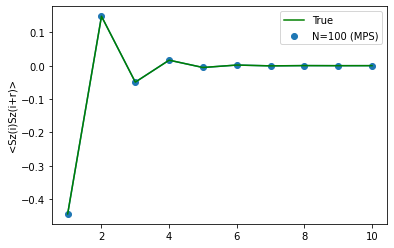

In [ ]:
import matplotlib.pyplot as plt


rvec=np.arange(1,11)
#print(corr_r0)
plt.scatter(rvec,corr_r0, label='N=100 (MPS)')
plt.plot(rvec,corr_r0)
plt.plot(rvec, 4/3*(-1/3)**rvec, color='green', label='True')
plt.ylabel("<Sz(i)Sz(i+r)>")

plt.savefig("N_100_MPS")
plt.legend()

In [ ]:
corr_r0[:10]

[-0.4444444444444436,
 0.148148148148148,
 -0.049382716049382616,
 0.016460905349794226,
 -0.00548696844993141,
 0.0018289894833104369,
 -0.000609663161103486,
 0.00020322105370114407,
 -6.774035123370419e-05,
 2.2580117077906988e-05]